<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Medicago_stacked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

# прочитане директно от изхода на приложението за обработка на сурови данни от апарата
df = pd.read_csv(csv_file, delimiter=',', decimal='.', skiprows=0)
csv_file

'Ms_2509_bca_all.csv'

In [20]:
df.head()

,groups,method,rep1,rep2
0,n1,GOX,1.790984,1.659836
1,n2,GOX,1.028689,1.020492
2,n3,GOX,1.250000,1.299180
3,n4,GOX,1.381148,1.217213
4,n5,GOX,1.364754,1.282787


In [21]:
def check_rep(d):
  # Convert 'rep1' and 'rep2' columns to numeric, handling errors
  d['rep1'] = pd.to_numeric(d['rep1'], errors='coerce')
  d['rep2'] = pd.to_numeric(d['rep2'], errors='coerce')

  # Check for missing values in 'rep1' and 'rep2'
  print(d.isnull().sum())
  d = d.dropna();
  print(d.isnull().sum())

  return d

In [22]:
def add_cols():

# Пример: създаване на нова колона 'GOX_rep1' и присвояване на филтрираните стойности
# Важно: Този код ще работи коректно само ако броят на редовете във филтрирания резултат съвпада с броя на редовете в оригиналния DataFrame,
# или ако присвоявате към нов DataFrame.

# Ако искате да добавите стойностите само за филтрираните редове и останалите да са NaN
  for method in df_long['method'].unique():
    df_long[method] = df_long[df_long['method'] == method]['value']
    print ('ready')

# Или, ако искате да присвоите стойностите към нов DataFrame
# new_df = df.copy()
# new_df['GOX_rep1'] = gox_rep1_values.reindex(new_df.index) # Използване на reindex за съвпадение на индексите

In [23]:
for col in df.columns:
  if col == 'rep1':
    df = check_rep(df)
    df_long = pd.melt(df, id_vars=['groups', 'method'], value_vars=['rep1', 'rep2'], var_name='replicate', value_name='value')
    add_cols()

groups    0
method    0
rep1      0
rep2      0
dtype: int64
groups    0
method    0
rep1      0
rep2      0
dtype: int64
ready
ready
ready
ready
ready


In [24]:
df_long.head()

,groups,method,replicate,value,GOX,PM,FRAP,MDA,TPC
0,n1,GOX,rep1,1.790984,1.790984,NaN,NaN,NaN,NaN
1,n2,GOX,rep1,1.028689,1.028689,NaN,NaN,NaN,NaN
2,n3,GOX,rep1,1.250000,1.250000,NaN,NaN,NaN,NaN
3,n4,GOX,rep1,1.381148,1.381148,NaN,NaN,NaN,NaN
4,n5,GOX,rep1,1.364754,1.364754,NaN,NaN,NaN,NaN


In [25]:
df_long.dtypes

,0
groups,object
method,object
replicate,object
value,float64
GOX,float64
PM,float64
FRAP,float64
MDA,float64
TPC,float64


In [38]:
new_ltr = ['abcd', 'abcd', 'abd', 'd', 'd', 'ce', 'bce', 'abc', 'bce',]
new_ltr2 = ['abc', 'abc', 'abd', 'abcd', 'ad', 'e', 'abc', 'abc', 'ce']

In [28]:
y_max = np.round(df_long['PM'].max(), 0)
y_max

np.float64(77.0)

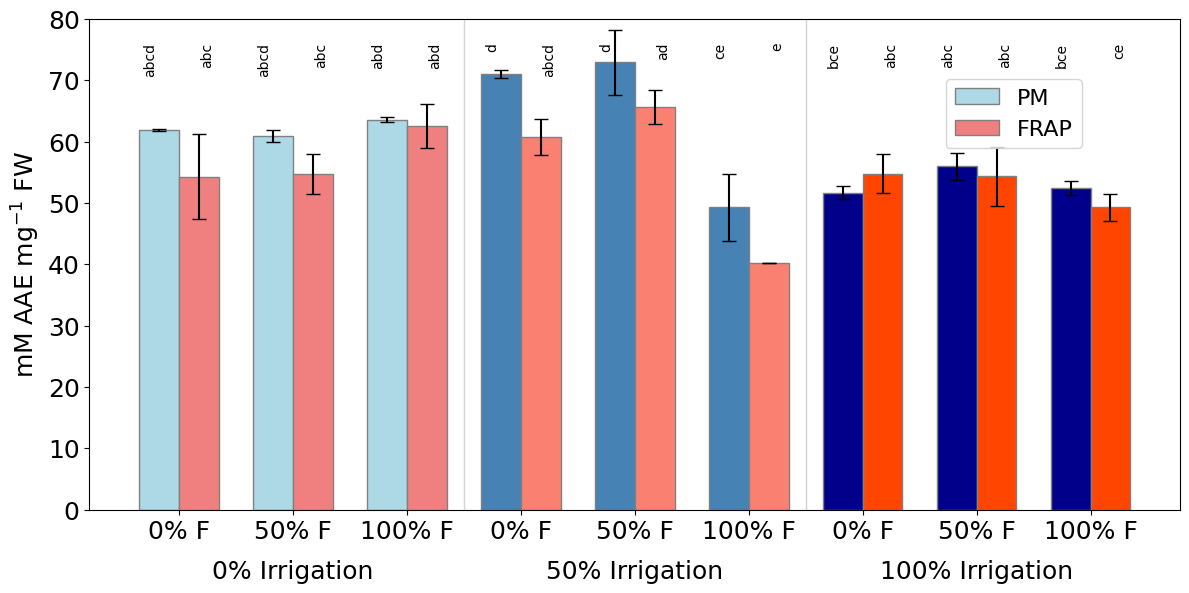

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Приблизителни данни от графиката
# Всяка тройка (PM, FRAP, PM_error, FRAP_error) отговаря на 0%, 50% и 100% Fertilization
# за дадено ниво на Irrigation (0%, 50%, 100%).

# ! Присвояване на df_long = df
df = df_long

# Изчисляване на средноаритметично за всяка група
pm_data = df.groupby('groups')['PM'].mean()
frap_data = df.groupby('groups')['FRAP'].mean()

# Изчисляване на стандартно отклонение за всяка група (извадка)
pm_errors = df.groupby('groups')['PM'].std(ddof=1)
frap_errors = df.groupby('groups')['FRAP'].std(ddof=1)

# Брой групи и ширина на колоните
n_groups = len(pm_data)
bar_width = 0.35

# Позиции на колоните
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(12, 6)) # Увеличаване на размера за по-добра четимост

# Създаване на колонна графика за PM
bar1 = ax.bar(index - bar_width/2, pm_data, bar_width, yerr=pm_errors, capsize=5,
              label='PM', color=['lightblue']*3 + ['steelblue']*3 + ['darkblue']*3,
              edgecolor='grey')

# Създаване на колонна графика за FRAP
bar2 = ax.bar(index + bar_width/2, frap_data, bar_width, yerr=frap_errors, capsize=5,
              label='FRAP', color=['lightcoral']*3 + ['salmon']*3 + ['orangered']*3,
              edgecolor='grey')

# Добавяне на букви за значимостта според тест на Туки
for i in range(len(df['groups'].unique())):
  ax.text(i*1.-0.25, y_max * .99, new_ltr[i],
          rotation=90, fontsize=10,
          verticalalignment='top', horizontalalignment='center')

# Добавяне на букви за значимостта според тест на Туки
for i in range(len(df['groups'].unique())):
  ax.text(i*1.+0.25, y_max * .99, new_ltr2[i],
          rotation=90, fontsize=10,
          verticalalignment='top', horizontalalignment='center')


# Добавяне на етикети и заглавие
ax.set_ylabel('mM AAE mg$^{-1}$ FW', size=18) # В оригиналната графика няма етикет на Y оста
ax.set_ylim(0, 80) # Задаване на лимити на Y оста
ax.set_yticks(np.arange(0, 81, 10)) # Деления на Y оста
ax.set_yticklabels(np.arange(0, 81, 10), size=18, rotation=0)

# Етикети за X оста
fertilization_labels = ['0% F', '50% F', '100% F'] * 3
ax.set_xticks(index)
ax.set_xticklabels(fertilization_labels, size=18, rotation=0, ha='center')

# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 2):
    ax.axvline(x=2.5 + i*3, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
ax.text(1, -.125, '0% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(4, -.125, '50% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(7, -.125, '100% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())

ax.legend(prop={'size': 16}, loc='upper right', bbox_to_anchor=(.92, 0.9))
plt.tight_layout() # Оптимизира разположението на елементите
plt.show()

In [15]:
new_ltr1 = ['ab', 'cd', 'cd', 'c', 'c', 'd', 'd', 'ac', 'b'] # GOX
new_ltr = ['abc', 'ab', 'abc', 'abc', 'ac', 'c', 'b', 'ac', 'd'] # MDA
new_ltr1 = ['ab', 'ab', 'ab', 'ab', 'a', 'b', 'ab', 'ab', 'ab'] # TPC

In [16]:
i = 1 # Избиране на един от 3-те метода !
# 0) 'GOX, 1) 'MDA', 2) 'TPC'

In [17]:
methods = ['GOX', 'MDA', 'TPC']

y_labels = ['\u03BCM Gly mg$^{-1}$ FW h$^{-1}$',
           'nM MDA mg$^{-1}$ FW',
           'mM GAE mg$^{-1}$ FW']

method = methods[i]
y_label = y_labels[i]

if i == 1:
  rnd = 2
else:
  rnd = 0

y_max = np.round(df[method].max(), rnd)
y_max

np.float64(0.1)

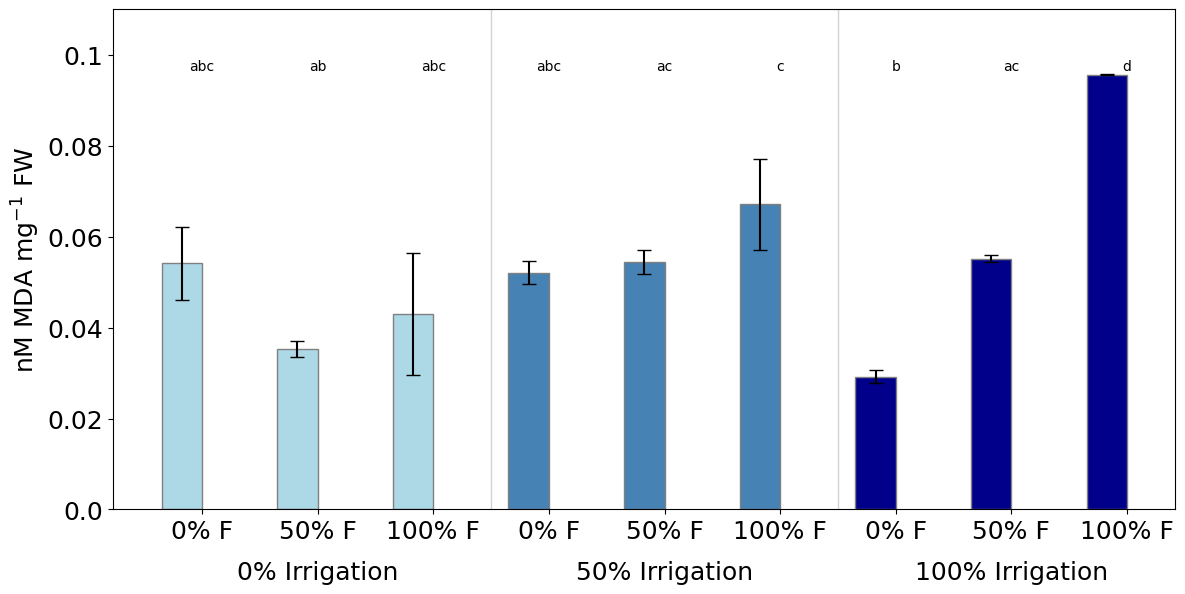

In [18]:
# Изчисляване на средноаритметично за всяка група
data = df.groupby('groups')[method].mean()

# Изчисляване на стандартно отклонение за всяка група (извадка)
errors = df.groupby('groups')[method].std(ddof=1)

# Брой групи и ширина на колоните
n_groups = len(data)
bar_width = 0.35

# Позиции на колоните
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(12, 6)) # Увеличаване на размера за по-добра четимост

# Създаване на колонна графика за PM
bar1 = ax.bar(index - bar_width/2, data, bar_width, yerr=errors, capsize=5,
              label='PM', color=['lightblue']*3 + ['steelblue']*3 + ['darkblue']*3,
              edgecolor='grey')

# Добавяне на букви за значимостта според тест на Туки
for i in range(len(df['groups'].unique())):
  ax.text(i*1.+0, y_max * .99, new_ltr[i],
          rotation=0, fontsize=10,
          verticalalignment='top', horizontalalignment='center')

# Добавяне на етикети и заглавие
ax.set_ylabel(y_label, size=18) # В оригиналната графика няма етикет на Y оста
ax.set_ylim(0, y_max + y_max*0.1) # Задаване на лимити на Y оста, добавям малко отгоре, за да се виждат буквите
yticks = np.arange(0, y_max + y_max*0.2, y_max/5) # Деления на Y оста, добавям стъпка y_max/5
ax.set_yticks(yticks) # Деления на Y оста
ax.set_yticklabels(np.round(yticks, rnd), size=18, rotation=0) # Закръгляне на етикетите на Y оста

# Етикети за X оста
fertilization_labels = ['0% F', '50% F', '100% F'] * 3
ax.set_xticks(index)
ax.set_xticklabels(fertilization_labels, size=18, rotation=0, ha='center')

# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 2):
    ax.axvline(x=2.5 + i*3, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
ax.text(1, -.125, '0% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(4, -.125, '50% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(7, -.125, '100% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())

plt.tight_layout() # Оптимизира разположението на елементите
plt.show()

fig.savefig(str(methods.index(method)) +  '_' + ('_').join(method.split('/')) + '_' + csv_file.split('.')[0] + '.jpg',
            dpi=600, bbox_inches='tight')